<a href="https://colab.research.google.com/github/mevangelista-alvarado/Python_Notas/blob/master/Leer_datos_del_sistema_Ajolote_con_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

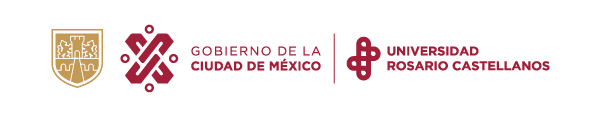

**Actualizado:** Octubre de 2023

**Autor:** Miguel Evangelista ([@mevagelista-alvarado](https://github.com/mevangelista-alvarado))

## Introducción

Mostramos una manera de descargar archivos en formato .csv del sistema Ajolote de datos abiertos de la CDMX, desde línea de comando de Google Colab y convertirlo en un dataframe.

### Descargando datos del sistema Ajolote (Datos abiertos de la CDMX)


Vamos a la siguiente url: https://datos.cdmx.gob.mx/

Para este caso particular, vamos a la sección _Conjuntos más utilizados_ y escojemos los datos de __Víctimas en carpetas de investigación FGJ__.

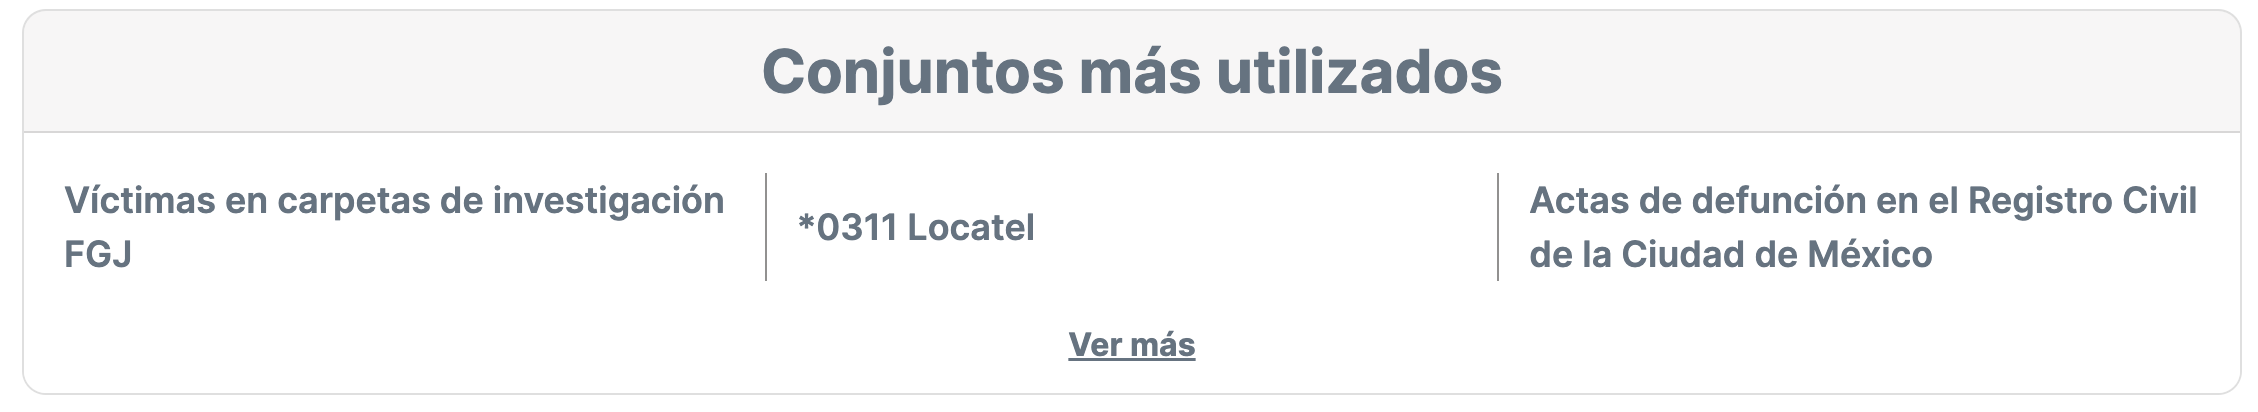

La url para __Víctimas en carpetas de investigación FGJ__ es https://datos.cdmx.gob.mx/dataset/victimas-en-carpetas-de-investigacion-fgj

Ahora dentro del conjuto de datos de __Víctimas en carpetas de investigación FGJ__ escojemos el que dice _Víctimas en Carpetas de Investigación (completa)_

Colocamos el cursor en el botón __Descargar__ y hacemos click derecho y selecionamos _copy link address_

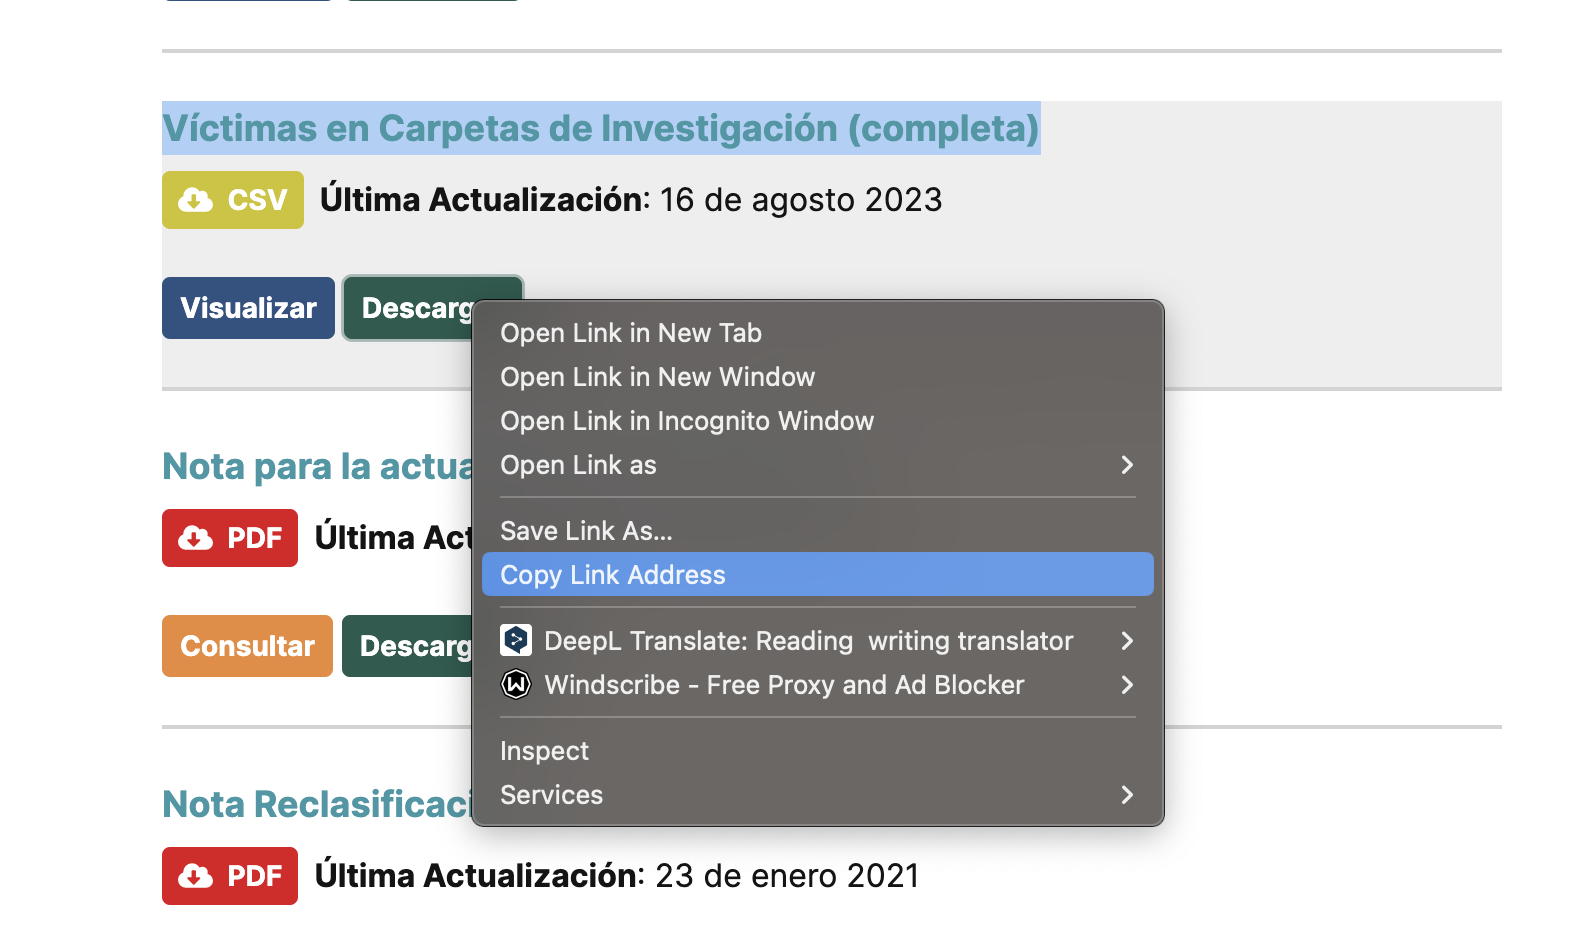

La url lo colocamos en una celda de código de la siguiente manera:

In [ ]:
!wget https://archivo.datos.cdmx.gob.mx/FGJ/victimas/victimasFGJ_2023_07.csv

Debemos notar que la url guarda un archivo en formato _.csv_.



### Leer el el archivo csv

Al terminar de ejecutarse la celda anterior, damos click en el icono de carpeta colocado en la barra izquierda de nuestro Google Colab

Al dar click veremos lo siguiente:

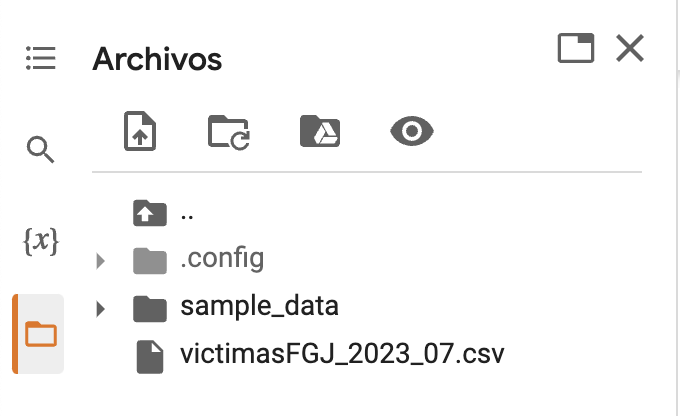

Notamos que el archivo ya se encuentra disponible en nuestro Google Colab, por tanto podemos leerlo con pandas de la siguiente manera:

In [ ]:
import pandas
df = pandas.read_csv("/content/victimasFGJ_2023_07.csv")

Vemos el contenido de nuestro _dataframe_.

In [ ]:
df

Veamos algunos datos del _dataframe_.

In [ ]:
df.shape

In [ ]:
df.columns

## Obtener una columnas

Selecionamos la columna _delito_.

In [ ]:
delito = df["delito"]
delito

Obtenemos los valores únicos que contiene la columna _delito_

In [ ]:
delitos_unicos = list(set(delito))
delitos_unicos

Observemos la cantidad de valores únicos de la columna _delito_

In [ ]:
len(delitos_unicos)

### Filtros

Supongamos que queremos filtrar el _dataframe_ mediante la columna _delito_ y nos interesan los siguientes delitos:

In [ ]:
filtro = [
    'ROBO A SUCURSAL BANCARIA SIN VIOLENCIA',
    'ROBO DE VEHICULO DE PEDALES',
    'ROBO A PASAJERO EN RTP CON VIOLENCIA',
    'ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA',
    'ROBO A NEGOCIO Y VEHICULO SIN VIOLENCIA',
    'ROBO A REPARTIDOR CON VIOLENCIA',
    'ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) CON VIOLENCIA',
]

In [ ]:
delito_df = df[df["delito"].isin(filtro)]
delito_df

Ahora supongamos que ordenamos el _dataframe_ mediante la columna _alcaldia_hecho_, es decir el orden es por alcaldía.

In [ ]:
_delito_df = delito_df.sort_values(by="alcaldia_hecho")
_delito_df

Eliminamos los valores `NaN` de la columna _alcaldia_hecho_ del _dataframe_.

In [ ]:
delito_without_nan_df = delito_df[delito_df['alcaldia_hecho'].notna()]
delito_without_nan_df